<h1>Feature Engineering</h1>


In [304]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import LineCollection

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


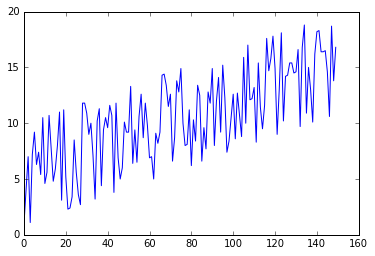

In [8]:
y = np.linspace(0,10, num=150, endpoint=False)
y_noise = np.random.randint(10, size=150) + y
y_two = np.sin(20)
y_noised = y_two + y_noise
y_noised = np.reshape(y_noised, (150,1))
y_noised = np.round(y_noised, decimals = 1)
plt.plot(y_noised)

In [9]:
print(y_noised)

[[  0.9]
 [  4. ]
 [  7. ]
 [  1.1]
 [  7.2]
 [  9.2]
 [  6.3]
 [  7.4]
 [  5.4]
 [ 10.5]
 [  4.6]
 [  5.6]
 [ 10.7]
 [  7.8]
 [  4.8]
 [  5.9]
 [  8. ]
 [ 11. ]
 [  3.1]
 [ 11.2]
 [  5.2]
 [  2.3]
 [  2.4]
 [  3.4]
 [  8.5]
 [  5.6]
 [  3.6]
 [  2.7]
 [ 11.8]
 [ 11.8]
 [ 10.9]
 [  9. ]
 [ 10. ]
 [  7.1]
 [  3.2]
 [ 10.2]
 [ 11.3]
 [  4.4]
 [  9.4]
 [ 10.5]
 [  9.6]
 [ 11.6]
 [ 10.7]
 [  3.8]
 [ 11.8]
 [  6.9]
 [  5. ]
 [  6. ]
 [ 10.1]
 [  9.2]
 [  9.2]
 [ 13.3]
 [  6.4]
 [  9.4]
 [  6.5]
 [ 10.6]
 [ 12.6]
 [  8.7]
 [ 11.8]
 [  9.8]
 [  6.9]
 [  7. ]
 [  5. ]
 [  9.1]
 [  8.2]
 [  9.2]
 [ 14.3]
 [ 14.4]
 [ 13.4]
 [ 11.5]
 [ 12.6]
 [  6.6]
 [  8.7]
 [ 13.8]
 [ 12.8]
 [ 14.9]
 [ 10. ]
 [  8. ]
 [  8.1]
 [ 11.2]
 [  6.2]
 [ 10.3]
 [  8.4]
 [ 13.4]
 [ 12.5]
 [  6.6]
 [  9.6]
 [  7.7]
 [ 12.8]
 [ 11.8]
 [ 14.9]
 [  8. ]
 [ 12. ]
 [ 14.1]
 [  9.2]
 [ 15.2]
 [ 12.3]
 [  7.4]
 [  8.4]
 [ 10.5]
 [ 12.6]
 [  8.6]
 [ 12.7]
 [ 10.8]
 [  8.8]
 [ 15.9]
 [ 10. ]
 [ 17. ]
 [ 12.1]
 [ 12.2]
 [ 13.2]
 

<h3>Normalise the data between 0 and 1</h3>

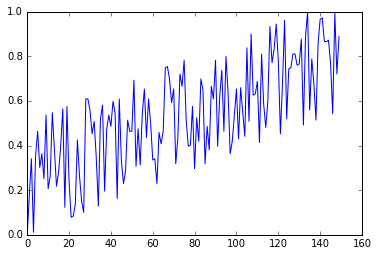

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
y_norma = scaler.fit_transform(y_noised)
plt.plot(y_norma)

<h3>generate an additional predict column</h3>

In [11]:
y_noised2 = y_noised
y_noised2 = np.delete(y_noised2, 0)
y_noised2 = np.reshape(y_noised2, (149,1))
print(y_noised2)

[[  4. ]
 [  7. ]
 [  1.1]
 [  7.2]
 [  9.2]
 [  6.3]
 [  7.4]
 [  5.4]
 [ 10.5]
 [  4.6]
 [  5.6]
 [ 10.7]
 [  7.8]
 [  4.8]
 [  5.9]
 [  8. ]
 [ 11. ]
 [  3.1]
 [ 11.2]
 [  5.2]
 [  2.3]
 [  2.4]
 [  3.4]
 [  8.5]
 [  5.6]
 [  3.6]
 [  2.7]
 [ 11.8]
 [ 11.8]
 [ 10.9]
 [  9. ]
 [ 10. ]
 [  7.1]
 [  3.2]
 [ 10.2]
 [ 11.3]
 [  4.4]
 [  9.4]
 [ 10.5]
 [  9.6]
 [ 11.6]
 [ 10.7]
 [  3.8]
 [ 11.8]
 [  6.9]
 [  5. ]
 [  6. ]
 [ 10.1]
 [  9.2]
 [  9.2]
 [ 13.3]
 [  6.4]
 [  9.4]
 [  6.5]
 [ 10.6]
 [ 12.6]
 [  8.7]
 [ 11.8]
 [  9.8]
 [  6.9]
 [  7. ]
 [  5. ]
 [  9.1]
 [  8.2]
 [  9.2]
 [ 14.3]
 [ 14.4]
 [ 13.4]
 [ 11.5]
 [ 12.6]
 [  6.6]
 [  8.7]
 [ 13.8]
 [ 12.8]
 [ 14.9]
 [ 10. ]
 [  8. ]
 [  8.1]
 [ 11.2]
 [  6.2]
 [ 10.3]
 [  8.4]
 [ 13.4]
 [ 12.5]
 [  6.6]
 [  9.6]
 [  7.7]
 [ 12.8]
 [ 11.8]
 [ 14.9]
 [  8. ]
 [ 12. ]
 [ 14.1]
 [  9.2]
 [ 15.2]
 [ 12.3]
 [  7.4]
 [  8.4]
 [ 10.5]
 [ 12.6]
 [  8.6]
 [ 12.7]
 [ 10.8]
 [  8.8]
 [ 15.9]
 [ 10. ]
 [ 17. ]
 [ 12.1]
 [ 12.2]
 [ 13.2]
 [  8.3]
 

<h3>Split into Testset and Trainset</h3>
<p>testSet are the observations from 101 to 149 and trainSet are the observations from 1 to 100.</p>

In [50]:
def divideDataset(dataset):
    trainSize    = int(len(dataset) * (2/3))
    testSize     = len(dataset) - trainSize
    
    trainset, testset = dataset[0:trainSize,:], dataset[trainSize:len(dataset),:]
    return np.array(trainset), np.array(testset)
    
trainX, testX   = divideDataset(y_noised)
trainY, testY   = divideDataset(y_noised2)

In [51]:
print(len(trainX), len(trainY) , len(testX), len(testY))

100 99 50 50


In [57]:
#trainY = np.insert(trainY, 0, 1)
print(len(trainY))

print(np.shape(trainX), np.shape(trainY))

100
(100, 1) (100,)


In [58]:
trainY = np.reshape(trainY, (100,1))

<h1>Task is to use <code>y_noised</code> to predict <code>y_noised2</code></h1>
<p> First, the algo will train on <code>trainX</code>, with labels <code>trainY</code>. Then it will test on <code>testX</code>, with labels <code>testY</code>.</p>

In [54]:
import tensorflow as tf

In [67]:
x = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([1, 1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x, W) + b

y_ = tf.placeholder(tf.float32, [None, 1])

In [68]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = trainX, trainY
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: testX, y_: testY}))

1.0


<h3>Of Course...</h3>
<p>The perfect accuracy doesn't really make sense because we have time series data, yet we have asked the algorithm to classify :-/ . Time to build a more appropriate algorithm and data-problem. I will re-script the data-generating process, but use the same placeholders. The model too will be re-scripted. </p>

----
<p>I will generate 100 points for the training set. Points on or below the axis will be blue. Points above the axis will be red.</p>

----

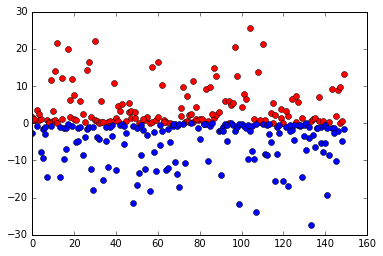

In [41]:
mean   = [0, 0]
cov    = [[1, 0], [0, 100]]
points = np.random.multivariate_normal(mean, cov, 150)
points = np.round(points, decimals = 2)

pos_points = points.copy()
neg_points = points.copy()

pos_points[pos_points <= 0] = np.nan
neg_points[neg_points >  0] = np.nan

plt.plot(pos_points, 'ro', color = 'r')
plt.plot(neg_points, 'ro', color = 'b',)

----
<p>Having visually generated the concept, I will now provide labels for all of the training points.</p>
<p>This means that everything above 0.5 wil have the label <code>0</code> and everything equal to or below 0.5, the label <code>1</code>.</p>
<p>I will create a dataframe which has three columns. Column one and two will be the (x,y) coordinates, and the third column will be the label.</p>

----

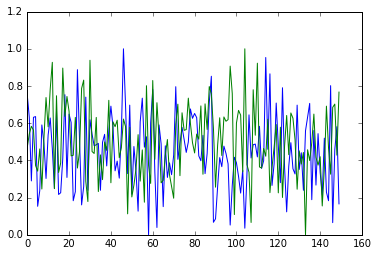

In [49]:
import pandas as pd

pointsDF = pd.DataFrame(points)

scaled = MinMaxScaler(feature_range=(0,1))
pointsDF = scaled.fit_transform(pointsDF)

pointsDF = pd.DataFrame(pointsDF)

plt.plot(pointsDF)

In [54]:
pointsDF['label'] = np.where((pointsDF[1] <= 0.5), '1', '0')
pointsDF

,0,1,label
0,0.755140,0.468190,1
1,0.631776,0.542382,0
2,0.289720,0.583349,0
3,0.631776,0.562960,0
4,0.635514,0.372286,1
5,0.153271,0.342269,1
6,0.237383,0.461582,1
7,0.590654,0.246177,1
8,0.491589,0.519917,0
9,0.302804,0.737965,0


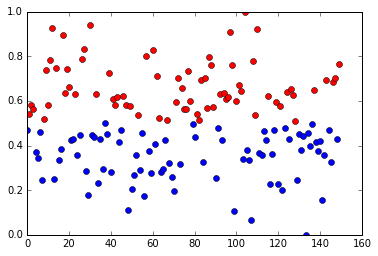

In [83]:
zeros = pointsDF[(pointsDF.label=='0')]
ones  = pointsDF[(pointsDF.label=='1')]


plt.plot(zeros[1], 'ro', color='r' )
plt.plot(ones[1],  'ro', color='b' )

----

<h3>I have simplified the problem.</h3>
<p>Now there is just one variable, apart from the <code>index</code> and the <code>label</code>. So for instance <code>point 120</code> or <code>point 3</code> or <code>point 43</code> and its correponding value, which takes on a number between <code>0</code> and <code>1</code>. If it is below <code>0.5</code> it takes on the <code>label 1</code> and if it is above <code>0.5</code> it takes on the <code>value 0</code>.</p>

----


<h3>Split into train and test sets, with seperate refs for each column</h3>

In [132]:
trainX = pointsDF.iloc[0:100,1]
testX  = pointsDF.iloc[101:, 1]

trainY = pointsDF.iloc[0:100,2]
testY  = pointsDF.iloc[101:, 2]

print(len(trainX), len(testX), len(trainY), len(testY))

100 49 100 49


<h3>Time to build the net...</h3>

In [84]:
import math
import tensorflow as tf

In [141]:
def placeholder_inputs(batch_size):
    
    stream_placeholder = tf.placeholder(tf.float32, shape=(None, 1))
    labels_placeholder = tf.placeholder(tf.int32, shape =(None))
    
    return stream_placeholder, labels_placeholder




#def fill_feed_dict(data_set, stream_pl, labels_pl):
    
#    stream_feed, labels_feed = data_set.next_batch(FLAGS.batch_size, FLAGS.fake_data)    
#    feed_dict = {
#        stream_pl: stream_feed,
#        labels_pl: labels_feed,
#    }
    
#    return feed_dict

#x = tf.placeholder(tf.float32, [None, 1])
#W = tf.Variable(tf.zeros([1, 1]))
#b = tf.Variable(tf.zeros([1]))
#y = tf.matmul(x, W) + b

#y_ = tf.placeholder(tf.float32, [None, 1])

In [85]:
def inference(dataStream_Observations, hidden1_units, hidden2_units):
    
    with tf.name_scope('hidden1'):
        weights = tf.Variable(
                    tf.truncated_normal([1, hidden1_units], 
                        stddev=1.0 / math.sqrt(float(1))), name="weights")
        biases  = tf.Variable(tf.zeros([hidden1_units]), name = "biases")
        hidden1 = tf.nn.relu(tf.matmul(1, weights) + biases)
    
    with tf.name_scope('hidden2'):
        weights = tf.Variable(
                    tf.truncated_normal([hidden1_units, hidden2_units],
                        stddev=1.0 / math.sqrt(float(hidden1_units))), name = 'weights')
        biases  = tf.Variable(
            tf.zeros([hidden2_units]), name = "biases")
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)
    
    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(
            tf.truncated_normal([hidden2_units, NUM_CLASSES],
                stddev=1.0 / math.sqrt(float(hidden2_units))), name='weights')
        biases  = tf.Variable(tf.zeros([NUM_CLASSES]), name = 'biases')
        logits  = tf.matmul(hidden2, weights) + biases
    
    return logits

In [86]:
def loss(logits, labels):
    labels        = tf.to_int64(labels)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, labels, name = 'xentropy')
    loss          = tf.reduce_mean(cross_entropy, name = 'xentropy_mean')
    
    return loss

In [90]:
def training(loss, learning_rate):
    tf.scalar_summary(loss.op.name, loss)
    optimizer   = tf.train.GradientDescentOptimizer(learning_rate)
    global_step = tf.Variable(0, name = 'global-step', trainable=False)
    train_op    = optimizer.minimize(loss, global_step=global_step)
    
    return train_op

In [87]:
def evaluation(logits, labels):
    correct = tf.nn.in_top_k(logits, labels, 1)
    
    return tf.reduce_sum

----

<h3>Taking a break from the Machine Learning</h3>

<p>Building a graph function that will color each point depending on whether the preceeding point is higher or lower than the given point.</p>

----

<h4>Here is our data</h4>

In [315]:
datapoints = np.linspace(0,30, num=30, endpoint=False)
noisy_datapoints = np.random.randint(4, size=30) + datapoints

In [322]:
print(datapoints)
print(noisy_datapoints)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.]
[  0.   1.   5.   3.   5.   6.   6.   7.  10.  12.  11.  12.  15.  15.  17.
  16.  19.  17.  18.  19.  22.  23.  25.  23.  27.  28.  29.  27.  28.  29.]


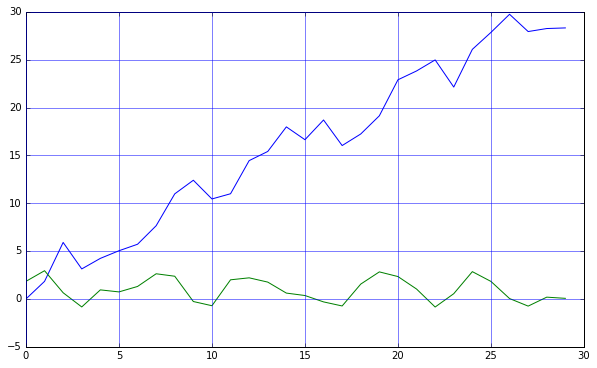

In [331]:
sinCurve       = np.sin(datapoints) + noisy_datapoints
sinCurve_grad  = np.gradient(sinCurve, 1)
# finding the second order derivative is unnecessary: sinCurve_twograd = np.gradient(sinCurve_grad)

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(numpy.arange(0,1,0.1))
#ax.set_yticks(numpy.arange(0,1.,0.1))

plt.plot(sinCurve)
plt.plot(sinCurve_grad)

grid(b=True, which='major', color='b', linestyle='-')
grid(b=True, which='minor', color='r', linestyle='--')

<h4>And now for the colouring function in pseudocode:</h4>
<p><code>for eachPoint <i>between</i> Point_2 <i>and<i> Point_n:</code></p>
<p><code>    if [eachPoint - 1] > eachPoint:</code></p>
<p><code>        turn eachPoint red</code></p>
<p><code>    elif [eachPoint - 1] < eachPoint:</code></p>
<p><code>        turn eachPoint green</code></p>
<p><code>    else:</code></p>
<p><code>        turn eachPoint grey</code></p>

In [328]:
sinCurveDF = pd.DataFrame({'sinCurve': sinCurve, 'grad':sinCurve_grad})
sinCurveDF['grad_direction'] = np.where((sinCurveDF.grad <= 0), 'r', 'b')
sinCurveDF['index'] = np.linspace(0,30, 30, endpoint=False)

In [329]:
sinCurveDF

,grad,sinCurve,grad_direction,index
0,1.841471,0.000000,b,0
1,2.954649,1.841471,b,1
2,0.649825,5.909297,b,2
3,-0.833050,3.141120,r,3
4,0.949978,4.243198,b,4
5,0.738693,5.041076,b,5
6,1.307955,5.720585,b,6
7,2.634387,7.656987,b,7
8,2.377566,10.989358,b,8
9,-0.266690,12.412118,r,9


<h3>Something is wrong with the gradient function.</h3>

<p>this is obvious from the plot below because lines which have a positive gradient are being coloured red, not blue. :-/</p>

----

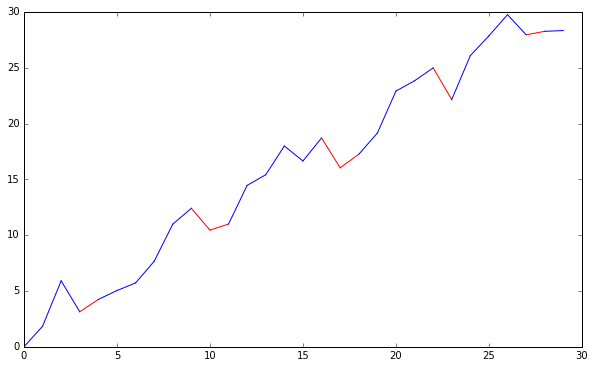

In [330]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
for s in range(0, len(sinCurveDF.sinCurve) - 1):
    x=(sinCurveDF.index[s], sinCurveDF.index[s + 1])
    y=(sinCurveDF.sinCurve[s], sinCurveDF.sinCurve[s + 1])
    ax.plot(x, y, c=sinCurveDF.grad_direction[s])
plt.show()

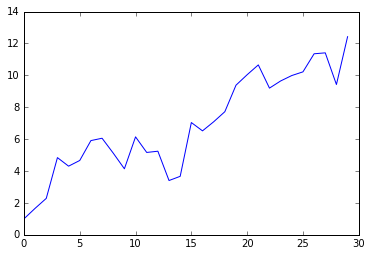

In [228]:
plt.plot(sinCurveDF.sinCurve)

In [101]:
sinCurveDF['index'] = np.linspace(0,30, num=30, endpoint=False)

In [152]:
sinCurveDF.sinCurve       = sinCurveDF.sinCurve.astype(float)
sinCurveDF.grad_direction = sinCurveDF.grad_direction.astype(str)

plt.plot(sinCurveDF.sinCurve, c = sinCurveDF.grad_direction)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x106531ae8> (for post_execute):


ValueError: to_rgba: Invalid rgba arg "0     b
1     b
2     b
3     b
4     r
5     b
6     b
7     r
8     r
9     b
10    b
11    r
12    r
13    r
14    b
15    b
16    b
17    b
18    b
19    b
20    b
21    r
22    r
23    b
24    b
25    b
26    b
27    r
28    b
29    b
Name: grad_direction, dtype: object"
to_rgb: Invalid rgb arg "('b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'r', 'b', 'b')"
sequence length is 30; must be 3 or 4

ValueError: to_rgba: Invalid rgba arg "0     b
1     b
2     b
3     b
4     r
5     b
6     b
7     r
8     r
9     b
10    b
11    r
12    r
13    r
14    b
15    b
16    b
17    b
18    b
19    b
20    b
21    r
22    r
23    b
24    b
25    b
26    b
27    r
28    b
29    b
Name: grad_direction, dtype: object"
to_rgb: Invalid rgb arg "('b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'r', 'b', 'b')"
sequence length is 30; must be 3 or 4

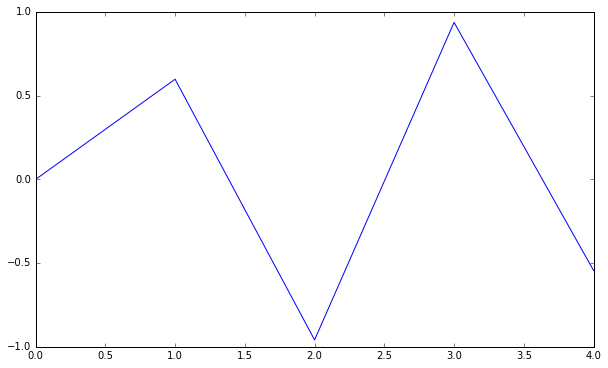

In [305]:
datums = np.linspace(0,10,5)
sinned = np.sin(datums)

plt.plot(sinned)

sinned = pd.DataFrame(sinned)

In [206]:
sinned['labels'] = np.where((sinned < 0), 'b', 'r')
print(sinned)

          0 labels
0  0.000000      r
1  0.598472      r
2 -0.958924      b
3  0.938000      r
4 -0.544021      b


          0 labels  index
0  0.000000      r      0
1  0.598472      r      1
2 -0.958924      b      2
3  0.938000      r      3
4 -0.544021      b      4


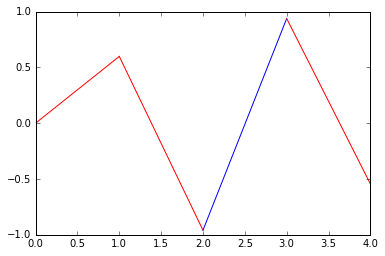

In [222]:
sinned['index'] = np.linspace(0,4,5)
print(sinned)

fig, ax = plt.subplots()
for s in range(0, len(sinned[0]) - 1):
    x=(sinned.index[s], sinned.index[s + 1])
    y=(sinned[0][s], sinned[0][s + 1])
    ax.plot(x, y, c=sinned['labels'][s])
plt.show()

In [219]:
xy = (np.random.random((1000, 2)) - 0.5).cumsum(axis=0)

# Reshape things so that we have a sequence of:
# [[(x0,y0),(x1,y1)],[(x0,y0),(x1,y1)],...]

xy = xy.reshape(-1, 1, 2)
print(xy)

segments = np.hstack([xy[:-1], xy[1:]])

#fig, ax = plt.subplots()
coll = LineCollection(segments, cmap=plt.cm.gist_ncar)
coll.set_array(np.random.random(xy.shape[0]))

ax.add_collection(coll)
ax.autoscale_view()

#plt.show()-

[[[ 0.33927757  0.48031115]]

 [[ 0.50086046  0.41722563]]

 [[ 0.1130158   0.55157328]]

 ..., 
 [[ 9.27688443  9.50490343]]

 [[ 9.66919703  9.70051174]]

 [[ 9.37708517  9.58696627]]]
